In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

,0,1
0,1.487304,-0.183527
1,0.841529,-0.315595
2,1.259543,-0.677870
3,1.523265,-0.209476
4,1.095395,-0.049631


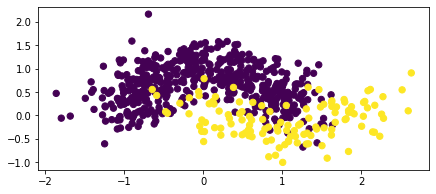

In [65]:
from sklearn.datasets import make_moons

n_samples=1000

X, y = make_moons(n_samples=n_samples, shuffle=False, noise=0.3, random_state=1)

# прореживаем, чтобы был дисбаланс
i = (y==0) | (np.random.rand(n_samples) > 0.75)
X = X[i, :]
y = y[i]

plt.figure(figsize=(7, 3))
plt.scatter(X[:,0], X[:,1], 40, y)
pd.DataFrame(X[:5,:])

In [46]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform',
                             algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)

In [84]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


(-2.2425519989173113,
 3.112141222103753,
 -1.6067286213635377,
 2.5779172936028725)

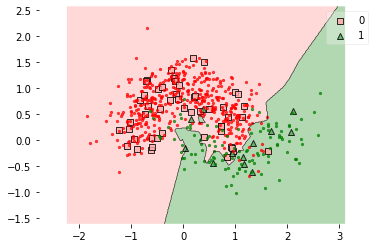

In [85]:
plot_decision_regions(X_train, y_train, model, colors="#FFAAAA,#55AA55")
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 5, c='red', alpha=0.7)
plt.scatter(X_test[y_test > 0, 0], X_test[y_test > 0, 1], 5, c='green', alpha=0.7)
plt.axis('equal')

In [52]:
model.score(X_train, y_train)

1.0

In [59]:
model.score(X_test, y_test)

0.8663157894736843

In [54]:
a = model.predict(X_train)

In [56]:
np.mean(a == y_train)

1.0

In [58]:
y_train

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0])

In [81]:
e = []
for k in range(1, 21):
  model = KNeighborsClassifier(n_neighbors=k, weights='uniform',
                             algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)
  model.fit(X_train, y_train)
  a = model.predict(X_test)
  # e.append(model.score(X_test, y_test))
  e.append(np.mean(a == y_test))

In [63]:
e

[0.8663157894736843,
 0.8421052631578947,
 0.8842105263157894,
 0.8326315789473684,
 0.8789473684210526,
 0.8494736842105263,
 0.8652631578947368,
 0.8473684210526315,
 0.8736842105263158,
 0.8326315789473684]

Text(0, 0.5, 'точность')

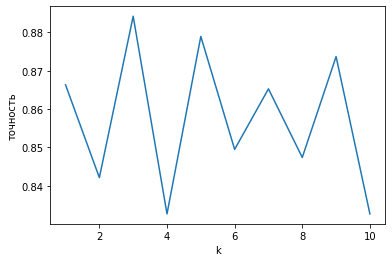

In [64]:
plt.plot(range(1, 11), e)
plt.xlabel('k')
plt.ylabel('точность')

Text(0, 0.5, 'точность')

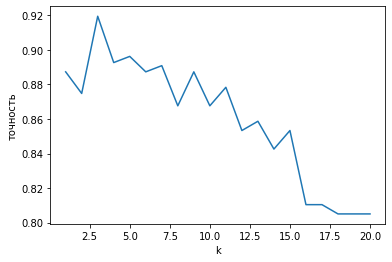

In [82]:
plt.plot(range(1, 21), e)
plt.xlabel('k')
plt.ylabel('точность')